In [4]:
import robot_color_tracking as track
import numpy as np

#tracker = track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='multipleColors', color=['red', 'yellow', 'blue', 'green'] , debug=True)
#tracker = track.HoughColorTrack(binaryThreshold = 80, hueTolerance = 10, debug=True, nbr_colors=4)
#tracker = track.ColorTrack(binaryThreshold = 80, hueTolerance = 70,kernel = np.ones((10,10)), nbr_colors=4)
#track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='multipleColors', color=['red', 'yellow', 'blue', 'green'] , debug=True)

#tracker = track.HoughColorTrack(binaryThreshold = 80, hueTolerance = 10, debug=True,param1=20, param2=10, minRadius=0,maxRadius=0, nbr_colors=4)
tracker = track.ColorTrack(img_width=900,binaryThreshold = 80, hueTolerance = 70,kernel = np.ones((10,10)), colors = ['blue'], debug=True)
tracker.track('../img/leds/place_2/blue/IMG_20201110_211645733_BURST000_COVER_TOP.jpg')


tracker.getPoses()

{'blue': array([[2222.01053669, 2520.04775108]])}

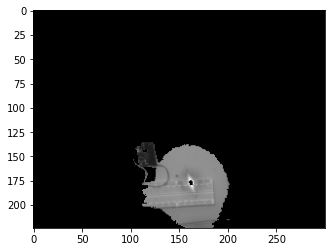

In [2]:
import matplotlib.pyplot as plt

#plt.gray()
#plt.imshow((tracker.segmentedImages['red']>80)*255)
#tracker.segmentedImages['blue']
plt.gray()
plt.imshow(tracker.segmentedImages['blue'])
#tracker.printRobotLocation()
#print(tracker.time)

In [1]:
import cv2
from os import listdir
from os.path import isfile, join
import json

#Algoritmo para pegar a posição dos objetos

def capturePosition(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        print("img: "+img_name+"\ncolor: "+c+"\nplace: "+p+"\nx: "+str(x)+"\ny: "+str(y))
        data[img_name]['position'].append([x,y])

        
#onlyfiles = [f for f in listdir('../img/colors/') if isfile(join('../img', f))]
places = listdir('../img/img_led')
colors = ['red', 'green', 'blue', 'yellow']
data = {}
img_name = ''

for p in places:
    for c in colors:
        files = listdir('../img/img_led/'+p+'/'+c+'/')
        for f in files:
            img_name = f
            data[img_name] = {"position" : [], "color": c, "place": p}
            img = cv2.imread('../img/img_led/'+p+'/'+c+'/'+img_name)
            cv2.namedWindow(c, cv2.WINDOW_NORMAL)
            cv2.imshow(c, img)
            cv2.resizeWindow(c, 600, 600)
            cv2.setMouseCallback(c,capturePosition)
            cv2.waitKey(0)
            cv2.destroyAllWindows()


with open('../algorithm_performance_data/real_positions/leds.json', 'w') as outfile:
    json.dump(data, outfile)

img: IMG_20201110_210308036.jpg
color: red
place: place_1
x: 2461
y: 1469
img: IMG_20201110_210329481.jpg
color: red
place: place_1
x: 1254
y: 2010
img: IMG_20201110_210350228.jpg
color: red
place: place_1
x: 2246
y: 187
img: IMG_20201110_210319880.jpg
color: red
place: place_1
x: 2461
y: 1774
img: IMG_20201110_220045149.jpg
color: red
place: place_1
x: 1529
y: 2569
img: IMG_20201110_210312372.jpg
color: red
place: place_1
x: 2378
y: 1539
img: IMG_20201110_210303930.jpg
color: red
place: place_1
x: 2149
y: 1719
img: IMG_20201110_210340069.jpg
color: red
place: place_1
x: 2288
y: 2593
img: IMG_20201110_210324652.jpg
color: red
place: place_1
x: 3418
y: 2149
img: IMG_20201110_210440275.jpg
color: green
place: place_1
x: 2246
y: 450
img: IMG_20201110_210423776.jpg
color: green
place: place_1
x: 2274
y: 1324
img: IMG_20201110_210447810.jpg
color: green
place: place_1
x: 1331
y: 1650
img: IMG_20201110_210452028.jpg
color: green
place: place_1
x: 3598
y: 1664
img: IMG_20201110_210415732.jpg


img: IMG_20201110_211853734_BURST001.jpg
color: green
place: place_2
x: 2471
y: 2479
img: IMG_20201110_211834075.jpg
color: green
place: place_2
x: 2489
y: 1518
img: IMG_20201110_211857116.jpg
color: green
place: place_2
x: 542
y: 2343
img: IMG_20201110_211900812.jpg
color: green
place: place_2
x: 1635
y: 1235
img: IMG_20201110_211848214.jpg
color: green
place: place_2
x: 1823
y: 2208
img: IMG_20201110_220244579.jpg
color: blue
place: place_2
x: 1227
y: 1546
img: IMG_20201110_211608996.jpg
color: blue
place: place_2
x: 2322
y: 1435
img: IMG_20201110_211655179.jpg
color: blue
place: place_2
x: 3307
y: 1608
img: IMG_20201110_211627470.jpg
color: blue
place: place_2
x: 2190
y: 1289
img: IMG_20201110_211645733_BURST000_COVER_TOP.jpg
color: blue
place: place_2
x: 2260
y: 2461
img: IMG_20201110_211621204.jpg
color: blue
place: place_2
x: 2288
y: 1386
img: IMG_20201110_211602319.jpg
color: blue
place: place_2
x: 2281
y: 1615
img: IMG_20201110_211640986.jpg
color: blue
place: place_2
x: 2260
y

In [1]:
import cv2
from os import listdir
from os.path import isfile, join
import json

#teste 1 imagem

def capturePosition(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print("img: "+img_name+"\nobject: "+str(i)+"\nx: "+str(x)+"\ny: "+str(y))
        data[img_name][i].append([x,y])


i=0
data = {}
img_name = 'IMG_20200923_193637993.jpg'
data[img_name] = [[],[],[],[]]
for i in range(4):
    img = cv2.imread('../img/shapes_colors/'+img_name)
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', img)
    cv2.resizeWindow('image', 600, 600)
    cv2.setMouseCallback('image',capturePosition)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

img: IMG_20200923_193637993.jpg
object: 0
x: 1282
y: 1726
img: IMG_20200923_193637993.jpg
object: 0
x: 2190
y: 859
img: IMG_20200923_193637993.jpg
object: 0
x: 2939
y: 1379
img: IMG_20200923_193637993.jpg
object: 0
x: 3050
y: 2329


In [1]:
# statisticas

import robot_color_tracking as track
import numpy as np
import json

# Compara o erro entre o resultado esperado e o erro encontrado
methods = [ 'shapes_one_color','shapes','shapes_colors','colors_naive','colors'] 
timeOfTrack = {}
for m in methods:
    if m == 'shapes':
        tracker = track.GeometricTrack(binaryThreshold= 140, segmentMethod='simple')
    elif m == 'colors_naive':
        tracker = track.ColorTrack(binaryThreshold = 80, hueTolerance = 10,kernel = np.ones((10,10)), nbr_colors=4)
    elif m == 'shapes_colors':
        tracker = track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='multipleColors', color=['red', 'yellow', 'blue', 'green'])
    elif m == 'colors':
        tracker = track.HoughColorTrack(binaryThreshold = 80, hueTolerance = 10,param1=20, param2=10, minRadius=0,maxRadius=0, nbr_colors=4)
    elif m == 'shapes_one_color':
        tracker = track.GeometricTrack(areaBounds = (200, 20000),binaryThreshold= 70, segmentMethod='oneColor',color='red')


    data = {}
    error = [{},{},{},{}]
    e = 0
    with open('../algorithm_performance_data/real_positions/'+m+'_positions.json', 'r') as f:
        data = json.load(f)
    imgNum = 0
    place = 0
    counterProgress = 0
    for d in sorted(data):
        print('\r'+m+': '+str(format(100*counterProgress/len(data),'.2f'))+'%', end='')
        counterProgress+=1
        shapes = tracker.getRobotIDs()
        tracker.track('../img/'+m+'/'+d)
        trackedPoses = tracker.getPoses()
        realPoses = data[d]
        i=0
        for pos in realPoses:
            if( len(pos) == 0):
                if shapes[i] in trackedPoses:
                    for cont in range(len(trackedPoses[shapes[i]])):
                        error[place][e] = 'false positive'
                        e+=1
            elif shapes[i] in trackedPoses:
                if len(trackedPoses[shapes[i]]) != 0:
                    pos = np.array(pos)
                    posT = np.array(trackedPoses[shapes[i]])
                    if posT.shape[0]==1:
                        if posT.shape[1] == 2:
                            error[place][e] = (posT - pos).tolist()
                        else:
                            error[place][e] = 'false negative'
                    else:
                        dif = posT - pos
                        argminError= (dif**2).sum(axis=1).argmin()
                        error[place][e] = dif[argminError].tolist()
                        for cont in range(posT.shape[0]-1):
                            e+=1
                            error[place][e] = "false positive"
                else:
                    error[place][e] = 'false negative'  
                e+=1
            else:
                #print(d)
                error[place][e] = 'false negative'
                e+=1
            i+=1
        if(imgNum%8 == 7):
            place+=1
        imgNum+=1

    print('\r'+m+': '+format(100*counterProgress/len(data),'.2f')+'%')
    timeOfTrack[m] = tracker.time
    for i in range(4):
        with open('../algorithm_performance_data/error/error_'+m+'_'+str(i)+'.json', 'w') as f:
            json.dump(error[i], f)
    with open('../algorithm_performance_data/time/time_'+m+'.json', 'w') as f:
            json.dump(timeOfTrack[m], f)

shapes_one_color: 100.00%
shapes: 100.00%
shapes_colors: 100.00%
colors_naive: 100.00%
colors: 100.00%


In [2]:
tracker.getPoses()

{'red': array([[2438.7988057 , 2186.78571429]]),
 'green': array([[2411.30762664, 1634.80364257]]),
 'blue': [],
 'yellow': array([[1566.09375  , 1336.4588648]])}

In [5]:
import json
import numpy as np

# Cálculo de medidas estatísticas

methods = [ 'shapes_one_color','shapes','shapes_colors','colors_naive','colors']
statistics = {}
for m in methods:

    distanceMean = []
    distanceDeviation = []
    falseNegative = []
    falsePositive = []
    detected = []
    

    for cont in range(4):    
        with open('../algorithm_performance_data/error/error_'+ m +'_'+str(cont)+'.json', 'r') as f:
            data = json.load(f)

        #for d in range(len(data)):
        #    data[d] = data[str(d)]
        #    del(data[str(d)])
        #print(data)
        errorNegative=0
        errorPositive=0
        errorDist = np.array([0,0])
        euclDist = []
        
        i=0
        for d in data:
            if data[d]=='false negative':
                errorNegative+=1
            elif data[d] == 'false positive':
                errorPositive += 1
            else:
                errorDist = errorDist + np.array(data[d])
                euclDist.append(np.sqrt((np.array(data[d])**2).sum()))
                i+=1
        #print(i)
        if i != 0:
            errorDist = np.sqrt(((errorDist/i)**2).sum())
        else:
            errorDist = -10
        errorNegative /= len(data)
        errorPositive /= len(data)
        detect = i/len(data)
        if len(euclDist)==0:
                distanceDeviation.append(-10)
        else:
            distanceDeviation.append(np.std(np.array(euclDist)))
        distanceMean.append(errorDist)
        falseNegative.append(errorNegative)
        falsePositive.append(errorPositive)
        detected.append(detect)
    with open('../algorithm_performance_data/time/time_'+ m +'.json', 'r') as f:
            timeOfProcessing = np.array(json.load(f))
    
    statistics[m]= {'distanceDeviation': distanceDeviation,'distanceMean':distanceMean,
                    'falseNegative':falseNegative, 'falsePositive':falsePositive, 'detected':detected,
                    'time': timeOfProcessing}


        #print('----------------'+str(cont))
        #print(statistics[0]['distanceMean'])
        #print(errorNegative)
        #print(errorPositive)
        #print(detected)
        #print(len(data))

In [3]:
statistics

{'shapes_one_color': {'distanceDeviation': [7.638349525060634,
   407.3296808278928,
   8.019856193439017,
   -10],
  'distanceMean': [5.89068716810696, 76.8544020367476, 9.162726425881957, -10],
  'falseNegative': [0.0, 0.17142857142857143, 0.058823529411764705, 1.0],
  'falsePositive': [0.0, 0.08571428571428572, 0.058823529411764705, 0.0],
  'detected': [1.0, 0.7428571428571429, 0.8823529411764706, 0.0],
  'time': array([0.12750578, 0.13792324, 0.12668133, 0.1293714 , 0.12961793,
         0.1266191 , 0.12727523, 0.12585211, 0.12624669, 0.1264751 ,
         0.13497567, 0.12531614, 0.12689686, 0.12456822, 0.12745595,
         0.12327766, 0.12632227, 0.12832141, 0.13426685, 0.12572074,
         0.12501097, 0.12838626, 0.13185763, 0.13048649, 0.12701225,
         0.1293149 , 0.12955356, 0.1249547 , 0.1307466 , 0.13072324,
         0.13065338, 0.12647629])},
 'shapes': {'distanceDeviation': [569.2955434949441, -10, -10, -10],
  'distanceMean': [100.15451904906944, -10, -10, -10],
  'false

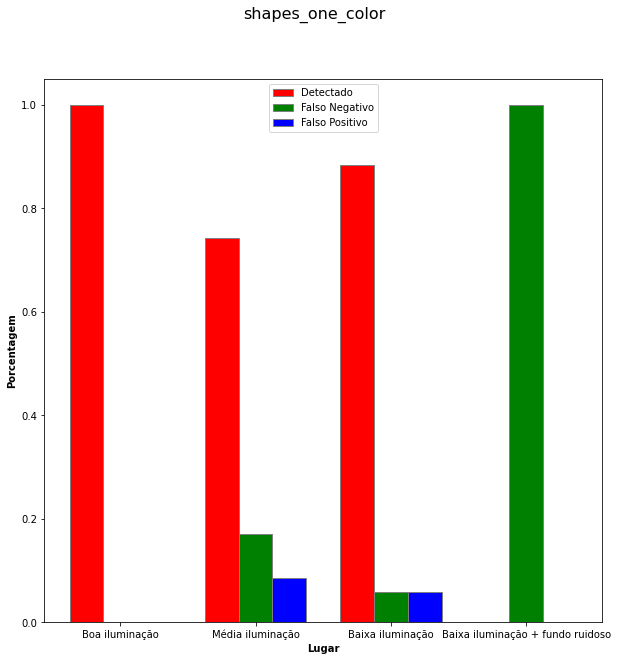

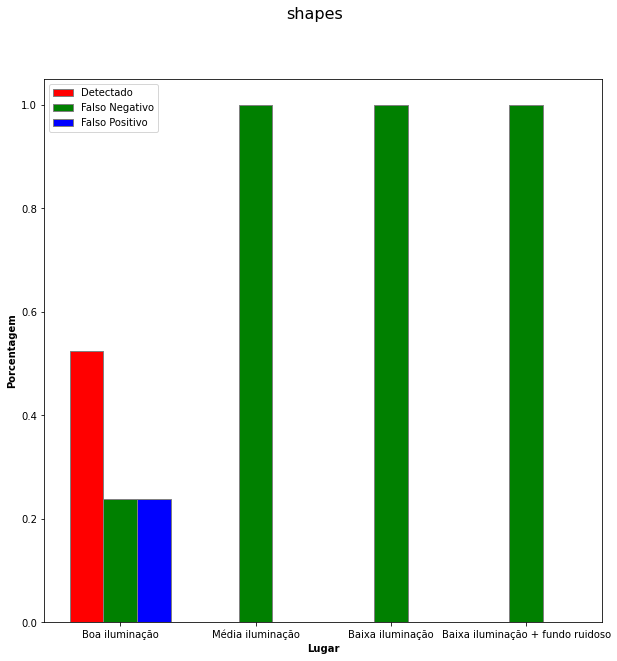

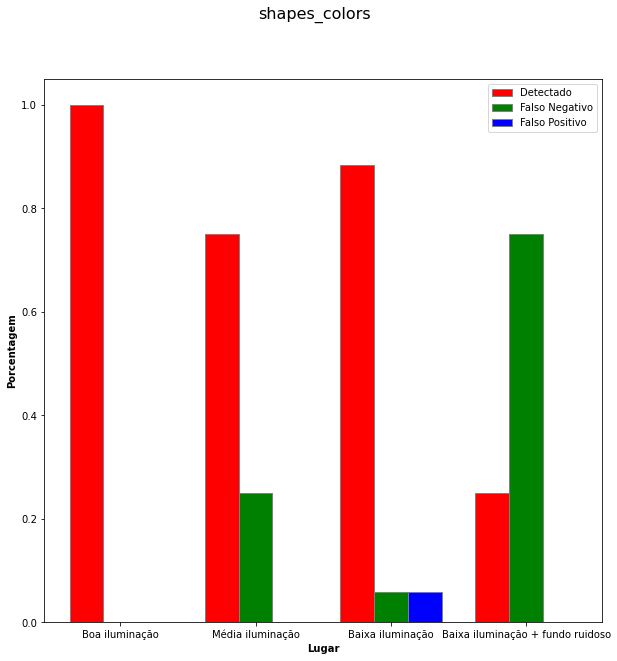

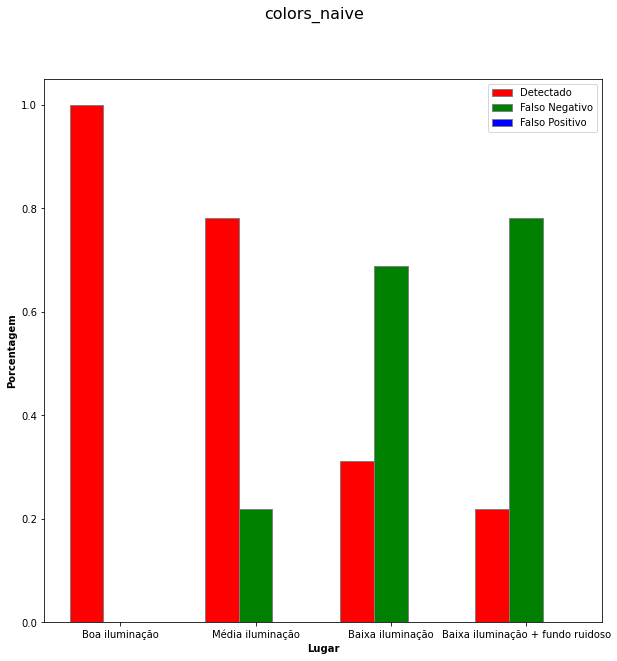

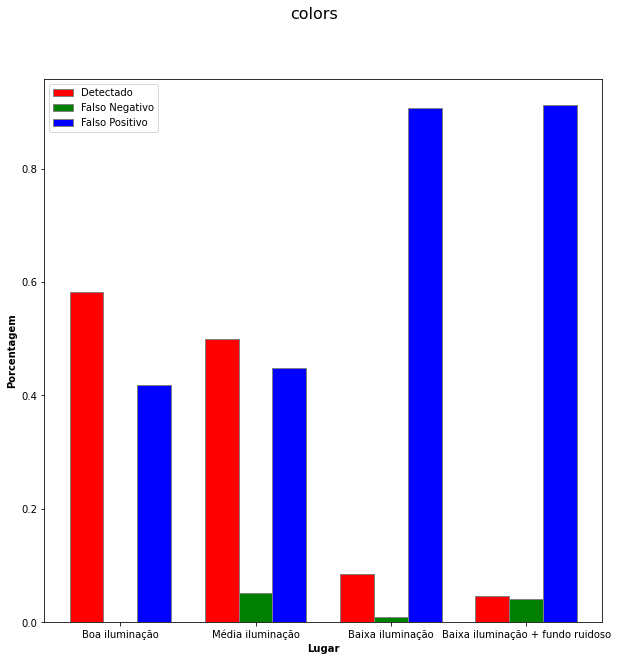

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

# Gráfico com índices de detecção

for m in statistics:
    plt.figure(figsize=(10,10))
    plt.bar(range(1, 16, 4), statistics[m]['detected'], color ='r', width =1, 
            edgecolor ='grey', label ='Detectado') 
    plt.bar(range(2, 16, 4), statistics[m]['falseNegative'], color ='g', width = 1, 
            edgecolor ='grey', label ='Falso Negativo') 
    plt.bar(range(3, 16, 4), statistics[m]['falsePositive'], color ='b', width = 1, 
            edgecolor ='grey', label ='Falso Positivo') 

    # Adding Xticks  
    plt.xlabel('Lugar', fontweight ='bold') 
    plt.ylabel('Porcentagem', fontweight ='bold') 
    plt.xticks([2, 6, 10 , 14],
               ['Boa iluminação', 'Média iluminação', 'Baixa iluminação', 'Baixa iluminação + fundo ruidoso']) 
    plt.suptitle(m, fontsize=16)
    plt.legend()
    plt.savefig('../algorithm_performance_data/graphs/'+m+'_detections.png')
    plt.show()

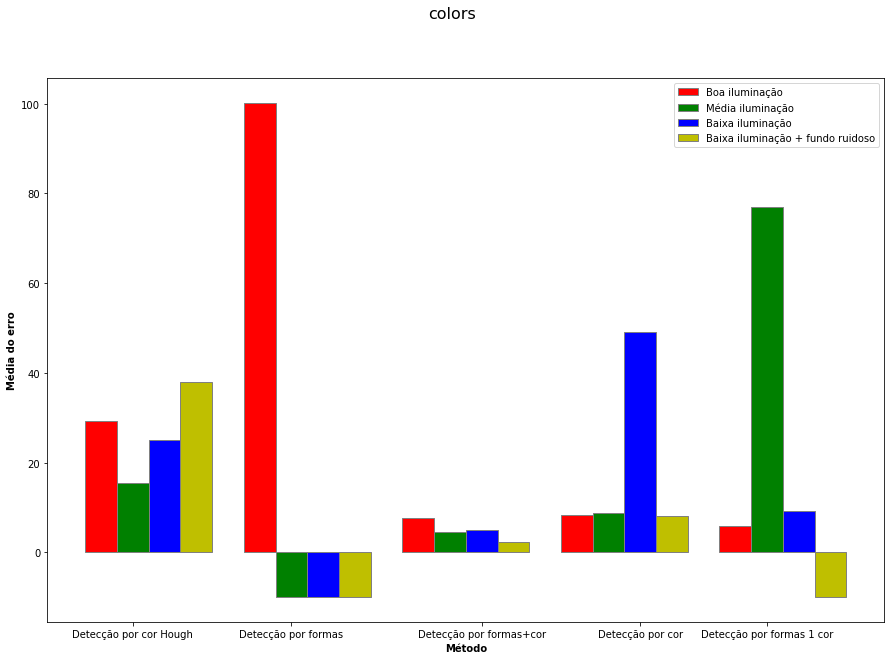

In [7]:
# Gráfico com distância média do local esperado

color = ['r', 'g', 'b', 'y']
label = ['Boa iluminação', 'Média iluminação', 'Baixa iluminação', 'Baixa iluminação + fundo ruidoso']

plt.figure(figsize=(15,10))
for i in range(4):
    plt.bar(range(i+1,25,5),[ statistics['colors']['distanceMean'][i],
                            statistics['shapes']['distanceMean'][i],
                            statistics['shapes_colors']['distanceMean'][i],
                            statistics['colors_naive']['distanceMean'][i],
                            statistics['shapes_one_color']['distanceMean'][i]],
                             color =color[i], width =1, edgecolor ='grey', label =label[i])

# Adding Xticks
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Média do erro', fontweight ='bold') 
plt.xticks([2, 7, 13, 18, 22], ['Detecção por cor Hough', 'Detecção por formas', 'Detecção por formas+cor', 'Detecção por cor', 'Detecção por formas 1 cor']) 
plt.suptitle(m, fontsize=16)   
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/mean_error.png')
plt.show()

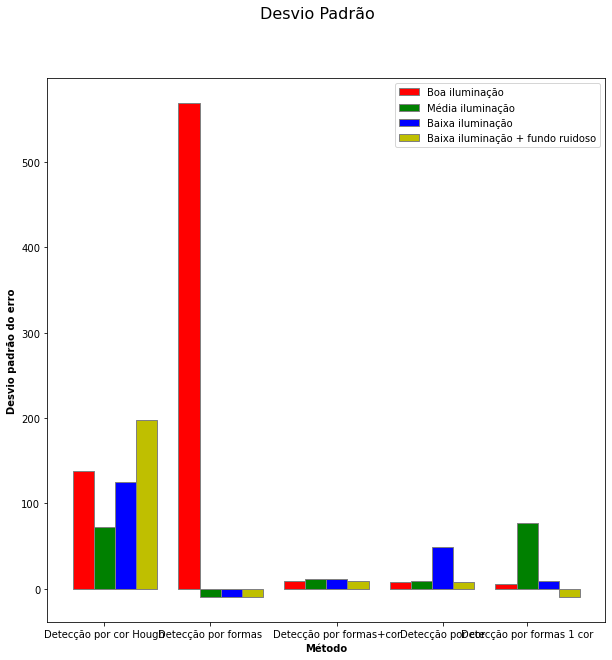

In [14]:
# Desvio padrão do erro da posição

color = ['r', 'g', 'b', 'y']
label = ['Boa iluminação', 'Média iluminação', 'Baixa iluminação', 'Baixa iluminação + fundo ruidoso']

plt.figure(figsize=(10,10))
for i in range(4):
    plt.bar(range(i+1,25,5),[ statistics['colors']['distanceDeviation'][i],
                            statistics['shapes']['distanceDeviation'][i],
                            statistics['shapes_colors']['distanceDeviation'][i],
                            statistics['colors_naive']['distanceMean'][i],
                            statistics['shapes_one_color']['distanceMean'][i] ]
                            , color =color[i], width =1, edgecolor ='grey', label =label[i])

# Adding Xticks  
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Desvio padrão do erro', fontweight ='bold') 
plt.xticks([2, 7, 13, 18, 22], ['Detecção por cor Hough', 'Detecção por formas', 'Detecção por formas+cor', 'Detecção por cor', 'Detecção por formas 1 cor']) 
plt.suptitle('Desvio Padrão', fontsize=16)   
plt.legend()
plt.savefig('../algorithm_performance_data/graphs/standard_deviation.png')
plt.show()

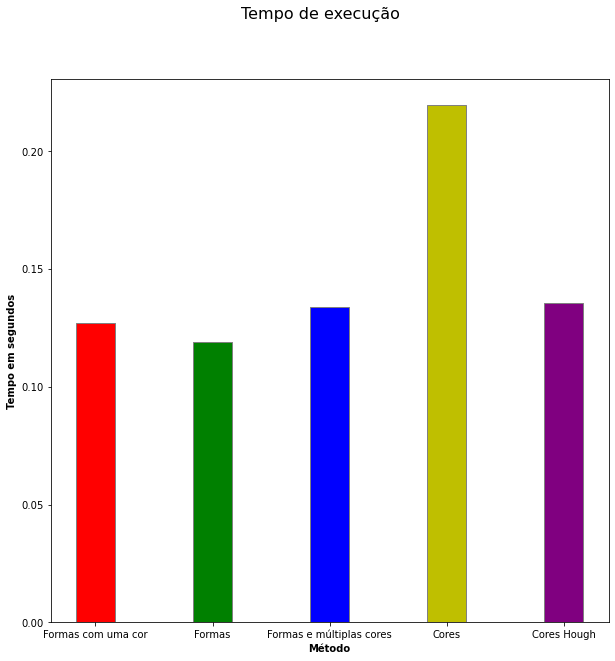

In [6]:
import matplotlib.pyplot as plt

# Tempo médio de execução
i=0
color = ['r', 'g', 'b', 'y', 'purple']
plt.figure(figsize=(10,10))
methods = [ 'shapes_one_color','shapes','shapes_colors', 'colors_naive', 'colors']
for m in methods:
    plt.bar(3*i,statistics[m]['time'].mean(), color =color[i], width =1, edgecolor ='grey', label =m)
    i+=1

# Adding Xticks  
plt.xlabel('Método', fontweight ='bold') 
plt.ylabel('Tempo em segundos', fontweight ='bold') 
plt.xticks(range(0,len(methods)*3, 3), 
           ['Formas com uma cor', 'Formas', 'Formas e múltiplas cores', 'Cores', 'Cores Hough']) 
plt.suptitle('Tempo de execução', fontsize=16)   
plt.savefig('../algorithm_performance_data/graphs/time.png')
plt.show()

In [2]:
# teste SIFT

#import numpy as np
#import cv2 as cv
#from scipy import *
#from pylab import *

#img = cv.imread('../img/papel3.jpg')
#gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#sift = cv.SIFT_create()
#kp = sift.detect(gray,None)
#img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv.imwrite('sift_keypoints.jpg',img)

True